In [6]:
import pandas as pd
df = pd.read_csv(r"C:\Users\shree\OneDrive\Desktop\rebuild prjct\bankstatements.csv") 
print("✓ Data loaded successfully!")

✓ Data loaded successfully!


In [7]:
print(f"Shape: {df.shape}")
print(f"Transactions: {df.shape[0]}, Columns: {df.shape[1]}")

print("\nColumn names:")
for i, col in enumerate(df.columns):
    print(f"{i+1}. {col}")

Shape: (509, 10)
Transactions: 509, Columns: 10

Column names:
1. date
2. DrCr
3. amount
4. balance
5. mode
6. name
7. Day
8. Month
9. Year
10. Tday


In [8]:
print(f"first 5 transaction {df.head()}")

first 5 transaction          date DrCr   amount    balance mode      name  Day  Month  Year  Tday
0  2022-01-01   Db  10000.0  473292.87  ATM       NaN    1      1  2022     1
1  2022-01-01   Db  10000.0  463292.87  ATM       NaN    1      1  2022     1
2  2022-01-02   Db    930.0  462362.87  UPI  AYUBRAJE    2      1  2022     2
3  2022-01-07   Db   2000.0  460362.87  UPI  ABUTALAH    7      1  2022     3
4  2022-01-10   Db   1000.0  459362.87  UPI  AGRAWALB   10      1  2022     4


In [9]:
print(f"missing values: {df.isnull().sum()}")

missing values: date         0
DrCr         0
amount       0
balance      0
mode         0
name       139
Day          0
Month        0
Year         0
Tday         0
dtype: int64


In [14]:
print(f"desc :{df.dtypes}")

desc :date        object
DrCr        object
amount     float64
balance    float64
mode        object
name        object
Day          int64
Month        int64
Year         int64
Tday         int64
dtype: object


In [15]:
print("data quality check")
print(f"total transactions: {len(df)}")
print(f"date range- {df['date'].min()} to {df['date'].max()}")
print(f"null/missing values {df.isnull().sum()}")

data quality check
total transactions: 509
date range- 2022-01-01 to 2023-10-07
null/missing values date         0
DrCr         0
amount       0
balance      0
mode         0
name       139
Day          0
Month        0
Year         0
Tday         0
dtype: int64


In [30]:
print("basic analysis about the transactions")
print(f"total credit transaction: {len(df[df['DrCr']=="Cr"])}")
print(f"total debit transaction: {len(df[df['DrCr']=="Db"])}")
print(f"average credit transfer: {df[df['DrCr']=="Cr"]['amount'].mean():.2f}")
print(f"average debit transfer: {df[df['DrCr']=="Db"]['amount'].mean():.2f}")

basic analysis about the transactions
total credit transaction: 136
total debit transaction: 373
average credit transfer: 14921.02
average debit transfer: 6481.49


In [41]:
print("debit vs credit ratio to analyse cahflow")
ratio = 373/136
print(f"debit vs credit count ratio {ratio:.2f}")
total_spent = df[df['DrCr'] == 'Db']['amount'].sum()
total_earned = df[df['DrCr'] == 'Cr']['amount'].sum()
money_ratio = total_spent / total_earned
print(f"amount debit vs credit ratio {money_ratio:.2f}")

debit vs credit ratio to analyse cahflow
debit vs credit count ratio 2.74
amount debit vs credit ratio 1.19


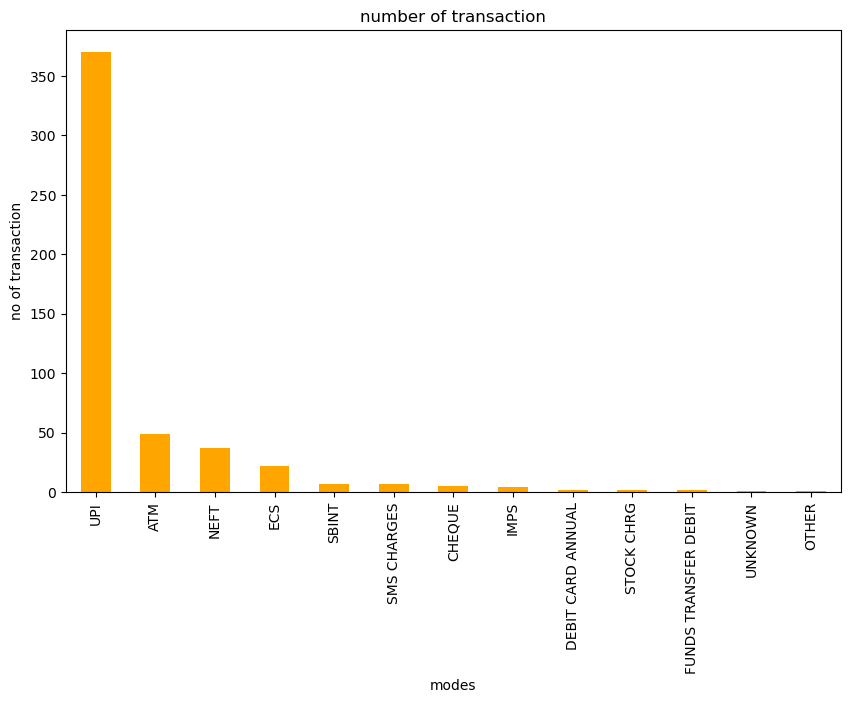

In [29]:
import matplotlib.pyplot as plt
transactioncount = df['mode'].value_counts()
plt.figure(figsize=(10,6))
transactioncount.plot(kind='bar',color='orange')
plt.title('number of transaction')
plt.xlabel('modes')
plt.ylabel('no of transaction')
plt.show()

In [50]:
## Project Overview
#Analyzed personal bank transactions date ranged from 1/1/2022 to 7/10/2023
# Goal: Understand spending patterns and transaction behaviors

## Data Description
#- #**Source: Kaggle Bank Statements Dataset (2022-2023)
#- **Transactions:509 rows
#- **Columns: Date, DrCr, Amount, Balance, Mode, Name,day,month,year,tday(transaction day)

### Key Findings
#-1. Most common transaction method: UPI
#-2. Average debit amount:'₹' 6481.49
#-#3. Debit vs Credit ratio: (debit trans/cerdit transamount) 1.19


In [2]:
##nov 16
##converting kaggle datato standardised format



In [12]:
import pandas as pd
import numpy as np
from datetime import datetime
def standardize_kaggle_to_project(df_kaggle):
    df_standard = pd.DataFrame()
    df_standard['date'] = pd.to_datetime(df_kaggle['date'])
    df_standard['description'] = df_kaggle['name'].fillna("unknown transaction")
    df_standard['amount'] = df_kaggle['amount'].astype(float)
    df_standard['type'] = df_kaggle['DrCr'].map({"Credit": "CREDIT", "Debit": "DEBIT"})
    df_standard['category'] = 'UNCATEGORIZED'
    df_standard['balance'] = df_kaggle['balance'].astype(float)
    df_standard['mode'] = df_kaggle['mode'].fillna('other')
    df_standard = df_standard.sort_values('date').reset_index(drop=True)
    return df_standard
df_kaggle = pd.read_csv(r"C:\Users\shree\OneDrive\Desktop\rebuild prjct\bankstatements.csv")
df_standardized = standardize_kaggle_to_project(df_kaggle)
print(f"Original Kaggle shape: {df_kaggle.shape}")
print(f"Standardized shape: {df_standardized.shape}")
print("\nStandardized columns:")
print(df_standardized.columns.tolist())

Original Kaggle shape: (509, 10)
Standardized shape: (509, 7)

Standardized columns:
['date', 'description', 'amount', 'type', 'category', 'balance', 'mode']


In [17]:
print("testing")
try:
    test_df = df_standardized
    test_df['date'] = pd.to_datetime(test_df['date'])
    print(f"Columns match: {all(col in test_df.columns for col in ['date', 'description', 'amount', 'type', 'category'])}")
except Exception as e:
    print(f"{e}")

testing
Columns match: True


In [20]:
df = df_standardized

print("Transaction Types:")
print(df['type'].value_counts())

print("\nTransaction Modes:")
print(df['mode'].value_counts())

print("\nCurrent Categories:")
print(df['category'].value_counts())

print("\nSample Descriptions:")
print(df['description'].value_counts().head(10))

Transaction Types:
Series([], Name: count, dtype: int64)

Transaction Modes:
mode
UPI                     370
ATM                      49
NEFT                     37
ECS                      22
SBINT                     7
SMS CHARGES               7
CHEQUE                    5
IMPS                      4
DEBIT CARD ANNUAL         2
STOCK CHRG                2
FUNDS TRANSFER DEBIT      2
UNKNOWN                   1
OTHER                     1
Name: count, dtype: int64

Current Categories:
category
UNCATEGORIZED    509
Name: count, dtype: int64

Sample Descriptions:
description
unknown transaction    139
ABUTALAH                80
PHONEPE                 35
NAFEESAB                33
SANGALLI                19
HDFCBANK                18
FLIPKART                16
DADAKHALA               14
AYUBRAJE                13
BUDESAHEB               12
Name: count, dtype: int64


In [22]:
class SmartIndianCategorizer:
    def __init__(self):
        self.category_patterns = {
            'Food & Dining': [r'SWIGGY', r'ZOMATO', r'DOMINOS', r'PIZZA', r'BURGER', r'CAFE', r'RESTAURANT'],
            'Groceries': [r'BIGBASKET', r'GROCERY', r'DMART', r'SUPERMARKET', r'MART'],
            'Shopping': [r'AMAZON', r'FLIPKART', r'MYNTRA', r'SHOP', r'SHOPPING'],
            'Bills & Utilities': [r'ELECTRICITY', r'WATER', r'GAS', r'INTERNET', r'RECHARGE', r'BILL'],
            'Transportation': [r'UBER', r'OLA', r'TAXI', r'FUEL', r'PETROL', r'BPCL'],
            'Entertainment': [r'NETFLIX', r'PRIME', r'HOTSTAR', r'MOVIE', r'CINEMA'],
            'EMI & Loans': [r'EMI', r'LOAN', r'CREDIT CARD', r'INSTALMENT'],
            'Investments': [r'MUTUAL FUND', r'STOCK', r'INVESTMENT'],
            'Healthcare': [r'MEDICAL', r'HOSPITAL', r'DOCTOR', r'PHARMACY'],
            'Personal Care': [r'SALON', r'SPA', r'BEAUTY']
        }
        self.learned_patterns = {}
        self.uncategorized_queue = []
    
    def exact_match_categorize(self, description):
        desc_upper = str(description).upper()
        for category, patterns in self.category_patterns.items():
            for pattern in patterns:
                if pattern in desc_upper:
                    return category
        return None
    
    def fuzzy_categorize(self, description, amount, mode):
        desc_upper = str(description).upper()
        abs_amount = abs(amount)
        
        if mode == 'UPI':
            if abs_amount < 150: return 'Personal Transfer'
            elif 150 <= abs_amount < 500: return 'Small Purchase'
            elif 500 <= abs_amount < 2000: return 'Shopping'
            else: return 'Major Expense'
        elif mode == 'ATM': return 'Cash Withdrawal'
        
        return None
    
    def smart_categorize(self, df):
        categorized_data = []
        for idx, row in df.iterrows():
            desc, amount, mode = row['description'], row['amount'], row['mode']
            category = self.exact_match_categorize(desc) or self.fuzzy_categorize(desc, amount, mode)
            if not category:
                category = 'UNCATEGORIZED'
                self.uncategorized_queue.append({'index': idx, 'description': desc, 'amount': amount, 'mode': mode})
            categorized_data.append(category)
        
        df_categorized = df.copy()
        df_categorized['category'] = categorized_data
        return df_categorized

categorizer = SmartIndianCategorizer()
print("✅ Smart categorizer initialized!")

✅ Smart categorizer initialized!


In [23]:
# STEP 2: APPLY SMART CATEGORIZATION
print("=== APPLYING SMART CATEGORIZATION ===")
df_smart_categorized = categorizer.smart_categorize(df_standardized)

print("✅ Smart categorization complete!")
print(f"📊 Category distribution:")
print(df_smart_categorized['category'].value_counts())

print(f"\n🔄 {len(categorizer.uncategorized_queue)} transactions need manual categorization")

# Quick preview of what got categorized
print("\n🔍 Sample categorized transactions:")
categorized_sample = df_smart_categorized[df_smart_categorized['category'] != 'UNCATEGORIZED']
print(categorized_sample[['description', 'amount', 'mode', 'category']].head(5))

=== APPLYING SMART CATEGORIZATION ===
✅ Smart categorization complete!
📊 Category distribution:
category
Shopping             149
Major Expense        129
UNCATEGORIZED         90
Cash Withdrawal       49
Personal Transfer     49
Small Purchase        41
Food & Dining          2
Name: count, dtype: int64

🔄 90 transactions need manual categorization

🔍 Sample categorized transactions:
           description   amount mode         category
0  unknown transaction  10000.0  ATM  Cash Withdrawal
1  unknown transaction  10000.0  ATM  Cash Withdrawal
2             AYUBRAJE    930.0  UPI         Shopping
3             ABUTALAH   2000.0  UPI    Major Expense
4             AGRAWALB   1000.0  UPI         Shopping


In [25]:
# STEP 3 - FIXED: PROPER MANUAL CATEGORIZATION
print("=== PROPER MANUAL CATEGORIZATION ===")

def proper_manual_categorize(categorizer, df_categorized):
    categories_list = list(categorizer.category_patterns.keys()) + ['Personal Transfer', 'Cash Withdrawal', 'Bank Charges', 'Income', 'Other']
    
    print(f"📝 Properly categorizing {len(categorizer.uncategorized_queue[:10])} transactions:\n")
    
    # PROPER CATEGORY MAPPING FOR EACH TRANSACTION TYPE
    for i, transaction in enumerate(categorizer.uncategorized_queue[:10]):
        desc = transaction['description'].upper()
        amount = transaction['amount']
        mode = transaction['mode']
        
        print(f"--- Transaction {i+1} ---")
        print(f"Description: '{transaction['description']}'")
        print(f"Amount: ₹{amount} | Mode: {mode}")
        
        # SMART CATEGORIZATION LOGIC
        if 'NEFT' in desc or 'ECS' in desc or 'IMPS' in desc:
            if amount > 0:
                category = 'Income'
                reason = "Bank transfer received - likely income"
            else:
                category = 'Personal Transfer' 
                reason = "Bank transfer sent - likely personal transfer"
                
        elif 'SMS' in desc or 'CHRG' in desc or 'DEBIT CARD ANNUAL' in desc:
            category = 'Bank Charges'
            reason = "Bank service charge/fee"
            
        elif 'SBINT' in desc:
            category = 'Bank Charges' 
            reason = "Interbank transfer charge"
            
        elif 'STOCK CHRG' in desc:
            category = 'Investments'
            reason = "Stock trading charge"
            
        elif 'FUNDS TRANSFER' in desc:
            if amount > 0:
                category = 'Income'
                reason = "Funds transfer received"
            else:
                category = 'Personal Transfer'
                reason = "Funds transfer sent"
                
        elif 'UNKNOWN' in desc:
            if mode == 'NEFT' and amount > 10000:
                category = 'Income' if amount > 0 else 'Major Expense'
                reason = f"Large {mode} transaction - likely {category}"
            elif amount < 100:
                category = 'Bank Charges'
                reason = "Small unknown transaction - likely bank charge"
            else:
                category = 'Other'
                reason = "Unknown transaction pattern"
        else:
            category = 'Other'
            reason = "No specific pattern matched"
        
        # Update the dataframe
        df_categorized.loc[transaction['index'], 'category'] = category
        print(f"✅ Categorized as: {category}")
        print(f"   Reason: {reason}")
        print()
    
    return df_categorized

# APPLY PROPER CATEGORIZATION
df_final = proper_manual_categorize(categorizer, df_smart_categorized)

=== PROPER MANUAL CATEGORIZATION ===
📝 Properly categorizing 10 transactions:

--- Transaction 1 ---
Description: 'unknown transaction'
Amount: ₹2400.0 | Mode: NEFT
✅ Categorized as: Other
   Reason: Unknown transaction pattern

--- Transaction 2 ---
Description: 'unknown transaction'
Amount: ₹7.09 | Mode: ECS
✅ Categorized as: Bank Charges
   Reason: Small unknown transaction - likely bank charge

--- Transaction 3 ---
Description: 'unknown transaction'
Amount: ₹2400.0 | Mode: NEFT
✅ Categorized as: Other
   Reason: Unknown transaction pattern

--- Transaction 4 ---
Description: 'unknown transaction'
Amount: ₹142.0 | Mode: DEBIT CARD ANNUAL
✅ Categorized as: Other
   Reason: Unknown transaction pattern

--- Transaction 5 ---
Description: 'unknown transaction'
Amount: ₹3187.0 | Mode: SBINT
✅ Categorized as: Other
   Reason: Unknown transaction pattern

--- Transaction 6 ---
Description: 'unknown transaction'
Amount: ₹52521.0 | Mode: NEFT
✅ Categorized as: Income
   Reason: Large NEFT t

In [26]:
# STEP 4: FINAL RESULTS & SAVE
print("=== FINAL CATEGORIZATION RESULTS ===")

# Update counts for remaining uncategorized
remaining_uncategorized = len(df_final[df_final['category'] == 'UNCATEGORIZED'])
total = len(df_final)
categorized = total - remaining_uncategorized

print("🎯 FINAL CATEGORY DISTRIBUTION:")
print(df_final['category'].value_counts())

print(f"\n📈 FINAL STATS:")
print(f"✅ {categorized}/{total} transactions categorized ({categorized/total*100:.1f}%)")
print(f"🔄 {remaining_uncategorized} transactions still uncategorized")

# SAVE THE FINAL DATA
df_final.to_csv('smart_indian_categorized.csv', index=False)
print("\n💾 Saved as 'smart_indian_categorized.csv'")

# SHOW SMART BREAKDOWN
print("\n🔍 SMART CATEGORY BREAKDOWN:")
category_summary = df_final[df_final['category'] != 'UNCATEGORIZED'].groupby('category').agg({
    'amount': ['count', 'sum', 'mean'],
}).round(2)

print(category_summary)

# PREVIEW FINAL DATA
print("\n👀 SAMPLE OF FINAL CATEGORIZED DATA:")
print(df_final[['description', 'amount', 'mode', 'category']].head(10))

=== FINAL CATEGORIZATION RESULTS ===
🎯 FINAL CATEGORY DISTRIBUTION:
category
Shopping             149
Major Expense        129
UNCATEGORIZED         80
Cash Withdrawal       49
Personal Transfer     49
Small Purchase        41
Other                  6
Bank Charges           3
Food & Dining          2
Income                 1
Name: count, dtype: int64

📈 FINAL STATS:
✅ 429/509 transactions categorized (84.3%)
🔄 80 transactions still uncategorized

💾 Saved as 'smart_indian_categorized.csv'

🔍 SMART CATEGORY BREAKDOWN:
                  amount                      
                   count         sum      mean
category                                      
Bank Charges           3       74.09     24.70
Cash Withdrawal       49   388059.00   7919.57
Food & Dining          2      741.00    370.50
Income                 1    52521.00  52521.00
Major Expense        129  1367409.00  10600.07
Other                  6    10641.00   1773.50
Personal Transfer     49     2889.53     58.97
Shopping

In [28]:
# Save the finalized categorized data
df_final.to_csv('smart_indian_categorized.csv', index=False)
print("✅ FINAL CATEGORIZED DATA SAVED!")

# Verify it saved
import os
if os.path.exists('smart_indian_categorized.csv'):
    print(f"📁 File saved at: {os.getcwd()}/smart_indian_categorized.csv")
    print(f"📊 Shape: {df_final.shape}")
    print("🎯 Category distribution:")
    print(df_final['category'].value_counts())
else:
    print("❌ File not saved - check permissions")

✅ FINAL CATEGORIZED DATA SAVED!
📁 File saved at: C:\Users\shree/smart_indian_categorized.csv
📊 Shape: (509, 7)
🎯 Category distribution:
category
Shopping             149
Major Expense        129
UNCATEGORIZED         80
Cash Withdrawal       49
Personal Transfer     49
Small Purchase        41
Other                  6
Bank Charges           3
Food & Dining          2
Income                 1
Name: count, dtype: int64
